In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
#sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
sys.path.insert(0, '../src')
import run_reb
import rebound
import numpy as np
import horizons_api
import tools
from bin_to_df import bin_to_df

import scipy.signal as signal

In [2]:
sbody = '22'
objname = '22'

#sbody = '2004KF19'
#objname = '2004KF19'
dt=500.
path = 'Sims/AstFam/'+objname
#path = 'TNOs/'+objname

#these arrays are all a bit of a mess, at some point would want to 
#change it to be a multi-dimensional array for the planets so they 
#don't all have to be handled by hand
a = np.zeros(1);e = np.zeros(1);inc = np.zeros(1);
p = np.zeros(1);q = np.zeros(1);h = np.zeros(1);k = np.zeros(1);
pu = np.zeros(1);qu = np.zeros(1);hu = np.zeros(1);ku = np.zeros(1);
pj = np.zeros(1);qj = np.zeros(1);hj = np.zeros(1);kj = np.zeros(1);
ps = np.zeros(1);qs = np.zeros(1);hs = np.zeros(1);ks = np.zeros(1);
pn = np.zeros(1);qn = np.zeros(1);hn = np.zeros(1);kn = np.zeros(1);
omega = np.zeros(1);
Omega = np.zeros(1);
M = np.zeros(1)
t = np.zeros(1);
fullfile = 'Sims/AstFam/22/archive.bin'
print(fullfile)
arc1 = rebound.SimulationArchive(fullfile)
series = bin_to_df('AstFam','22',arc1,'8planet')
#series = pd.read_csv(path+'/series.csv')
t = series['t'].values
dt=int(t[1])/20
a = series['a'].values
e = series['ecc'].values
inc = series['inc'].values
#omega = series['omega'].values
#Omega = series['Omega'].values
#M = series['M'].values
h = series['h'].values
k = series['k'].values
p = series['p'].values
q = series['q'].values

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hmr = series['hmr'].values
kmr = series['kmr'].values
pmr = series['pmr'].values
qmr = series['qmr'].values

hv = series['hv'].values
kv = series['kv'].values
pv = series['pv'].values
qv = series['qv'].values

he = series['he'].values
ke = series['ke'].values
pe = series['pe'].values
qe = series['qe'].values

hmc = series['hmc'].values
kmc = series['kmc'].values
pmc = series['pmc'].values
qmc = series['qmc'].values

Sims/AstFam/22/archive.bin


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


In [3]:
dt = 1000
n = len(h)
freq = np.fft.rfftfreq(n,d=dt)

#particle eccentricity vectors
Yh= np.fft.rfft(h)
Yk = np.fft.rfft(k)
#giant planets
Yhmc = np.fft.rfft(hmc)
Yhv = np.fft.rfft(hv)
Yhe = np.fft.rfft(he)
Yhmr = np.fft.rfft(hmr)
Ykmc = np.fft.rfft(kmc)
Ykv = np.fft.rfft(kv)
Yke = np.fft.rfft(ke)
Ykmr = np.fft.rfft(kmr)
Yhu = np.fft.rfft(hu)
Yhj = np.fft.rfft(hj)
Yhn = np.fft.rfft(hn)
Yhs = np.fft.rfft(hs)
Yku = np.fft.rfft(ku)
Ykj = np.fft.rfft(kj)
Ykn = np.fft.rfft(kn)
Yks = np.fft.rfft(ks)

#convert to power
pYh = np.abs(Yh)
pYk = np.abs(Yk)

pYhmc = np.abs(Yhmc)
pYhv = np.abs(Yhv)
pYhe = np.abs(Yhe)
pYhmr = np.abs(Yhmr)
pYkmc = np.abs(Ykmc)
pYkmr = np.abs(Ykmr)
pYkv = np.abs(Ykv)
pYke = np.abs(Yke)

pYhu = np.abs(Yhu)
pYhn = np.abs(Yhn)
pYhj = np.abs(Yhj)
pYhs = np.abs(Yhs)
pYku = np.abs(Yku)
pYkn = np.abs(Ykn)
pYkj = np.abs(Ykj)
pYks = np.abs(Yks)


#find the max power and indexes of that max power
#(disregarding the frequency=0 terms)
kumax = pYku[1:].max()
knmax = pYkn[1:].max()
ksmax = pYks[1:].max()
kjmax = pYkj[1:].max()
humax = pYhu[1:].max()
hnmax = pYhn[1:].max()
hsmax = pYhs[1:].max()
hjmax = pYhj[1:].max()

kmcmax = pYkmc[1:].max()
kmrmax = pYkmr[1:].max()
kvmax = pYkv[1:].max()
kemax = pYke[1:].max()
hmcmax = pYhmc[1:].max()
hmrmax = pYhmr[1:].max()
hvmax = pYhv[1:].max()
hemax = pYhe[1:].max()

#(these need the plus 1 to account for neglecting the f=0 term)
ihmax = np.argmax(pYh[1:])+1
ikmax = np.argmax(pYk[1:])+1
ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 
ikumax = np.argmax(pYku[1:])+1 
iknmax = np.argmax(pYkn[1:])+1
iksmax = np.argmax(pYks[1:])+1
ikjmax = np.argmax(pYkj[1:])+1 

ihmcmax = np.argmax(pYhmc[1:])+1
ihmrmax = np.argmax(pYhmr[1:])+1 
ihvmax = np.argmax(pYhv[1:])+1 
ihemax = np.argmax(pYhe[1:])+1 
ikmcmax = np.argmax(pYkmc[1:])+1 
ikmrmax = np.argmax(pYkmr[1:])+1
ikvmax = np.argmax(pYkv[1:])+1
ikemax = np.argmax(pYke[1:])+1 


#particle inclination vectors
Yp= np.fft.rfft(p)
Yq = np.fft.rfft(q)
#giant planets
Ypu = np.fft.rfft(pu)
Ypj = np.fft.rfft(pj)
Ypn = np.fft.rfft(pn)
Yps = np.fft.rfft(ps)
Yqu = np.fft.rfft(qu)
Yqj = np.fft.rfft(qj)
Yqn = np.fft.rfft(qn)
Yqs = np.fft.rfft(qs)

Ypmc = np.fft.rfft(pmc)
Ypmr = np.fft.rfft(pmr)
Ypv = np.fft.rfft(pv)
Ype = np.fft.rfft(pe)
Yqmc = np.fft.rfft(qmc)
Yqmr = np.fft.rfft(qmr)
Yqv = np.fft.rfft(qv)
Yqe = np.fft.rfft(qe)

#convert to power
pYp = np.abs(Yp)
pYq = np.abs(Yq)
pYpu = np.abs(Ypu)
pYpn = np.abs(Ypn)
pYpj = np.abs(Ypj)
pYps = np.abs(Yps)
pYqu = np.abs(Yqu)
pYqn = np.abs(Yqn)
pYqj = np.abs(Yqj)
pYqs = np.abs(Yqs)

pYpmc = np.abs(Ypmc)
pYpmr = np.abs(Ypmr)
pYpv = np.abs(Ypv)
pYpe = np.abs(Ype)
pYqmc = np.abs(Yqmc)
pYqmr = np.abs(Yqmr)
pYqv = np.abs(Yqv)
pYqe = np.abs(Yqe)


#find the max power and indexes of that max power
#(disregarding the frequency=0 terms)
pumax = pYpu[1:].max()
pnmax = pYpn[1:].max()
psmax = pYps[1:].max()
pjmax = pYpj[1:].max()
qumax = pYqu[1:].max()
qnmax = pYqn[1:].max()
qsmax = pYqs[1:].max()
qjmax = pYqj[1:].max()

pmcmax = pYpmc[1:].max()
pmrmax = pYpmr[1:].max()
pvmax = pYpv[1:].max()
pemax = pYpe[1:].max()
qmcmax = pYqmc[1:].max()
qmrmax = pYqmr[1:].max()
qvmax = pYqv[1:].max()
qemax = pYqe[1:].max()

ipmax = np.argmax(pYp[1:])+1
iqmax = np.argmax(pYq[1:])+1
ipumax = np.argmax(pYpu[1:])+1
ipnmax = np.argmax(pYpn[1:])+1 
ipsmax = np.argmax(pYps[1:])+1 
ipjmax = np.argmax(pYpj[1:])+1 
iqumax = np.argmax(pYqu[1:])+1 
iqnmax = np.argmax(pYqn[1:])+1
iqsmax = np.argmax(pYqs[1:])+1
iqjmax = np.argmax(pYqj[1:])+1 

ipmcmax = np.argmax(pYpmc[1:])+1
ipmrmax = np.argmax(pYpmr[1:])+1 
ipvmax = np.argmax(pYpv[1:])+1 
ipemax = np.argmax(pYpe[1:])+1 
iqmcmax = np.argmax(pYqmc[1:])+1 
iqmrmax = np.argmax(pYqmr[1:])+1
iqvmax = np.argmax(pYqv[1:])+1
iqemax = np.argmax(pYqe[1:])+1 


print("peak planet eccentricity periods (years):")
print("Jupiter %f" % (1/freq[ikjmax]))
print("Saturn %f" % (1/freq[iksmax]))
print("Uranus %f" % (1/freq[ikumax]))
print("Neptune %f" % (1/freq[iknmax]))

peak planet eccentricity periods (years):
Jupiter 72471.014493
Saturn 303060.606061
Uranus 45876.146789
Neptune 303060.606061


5001


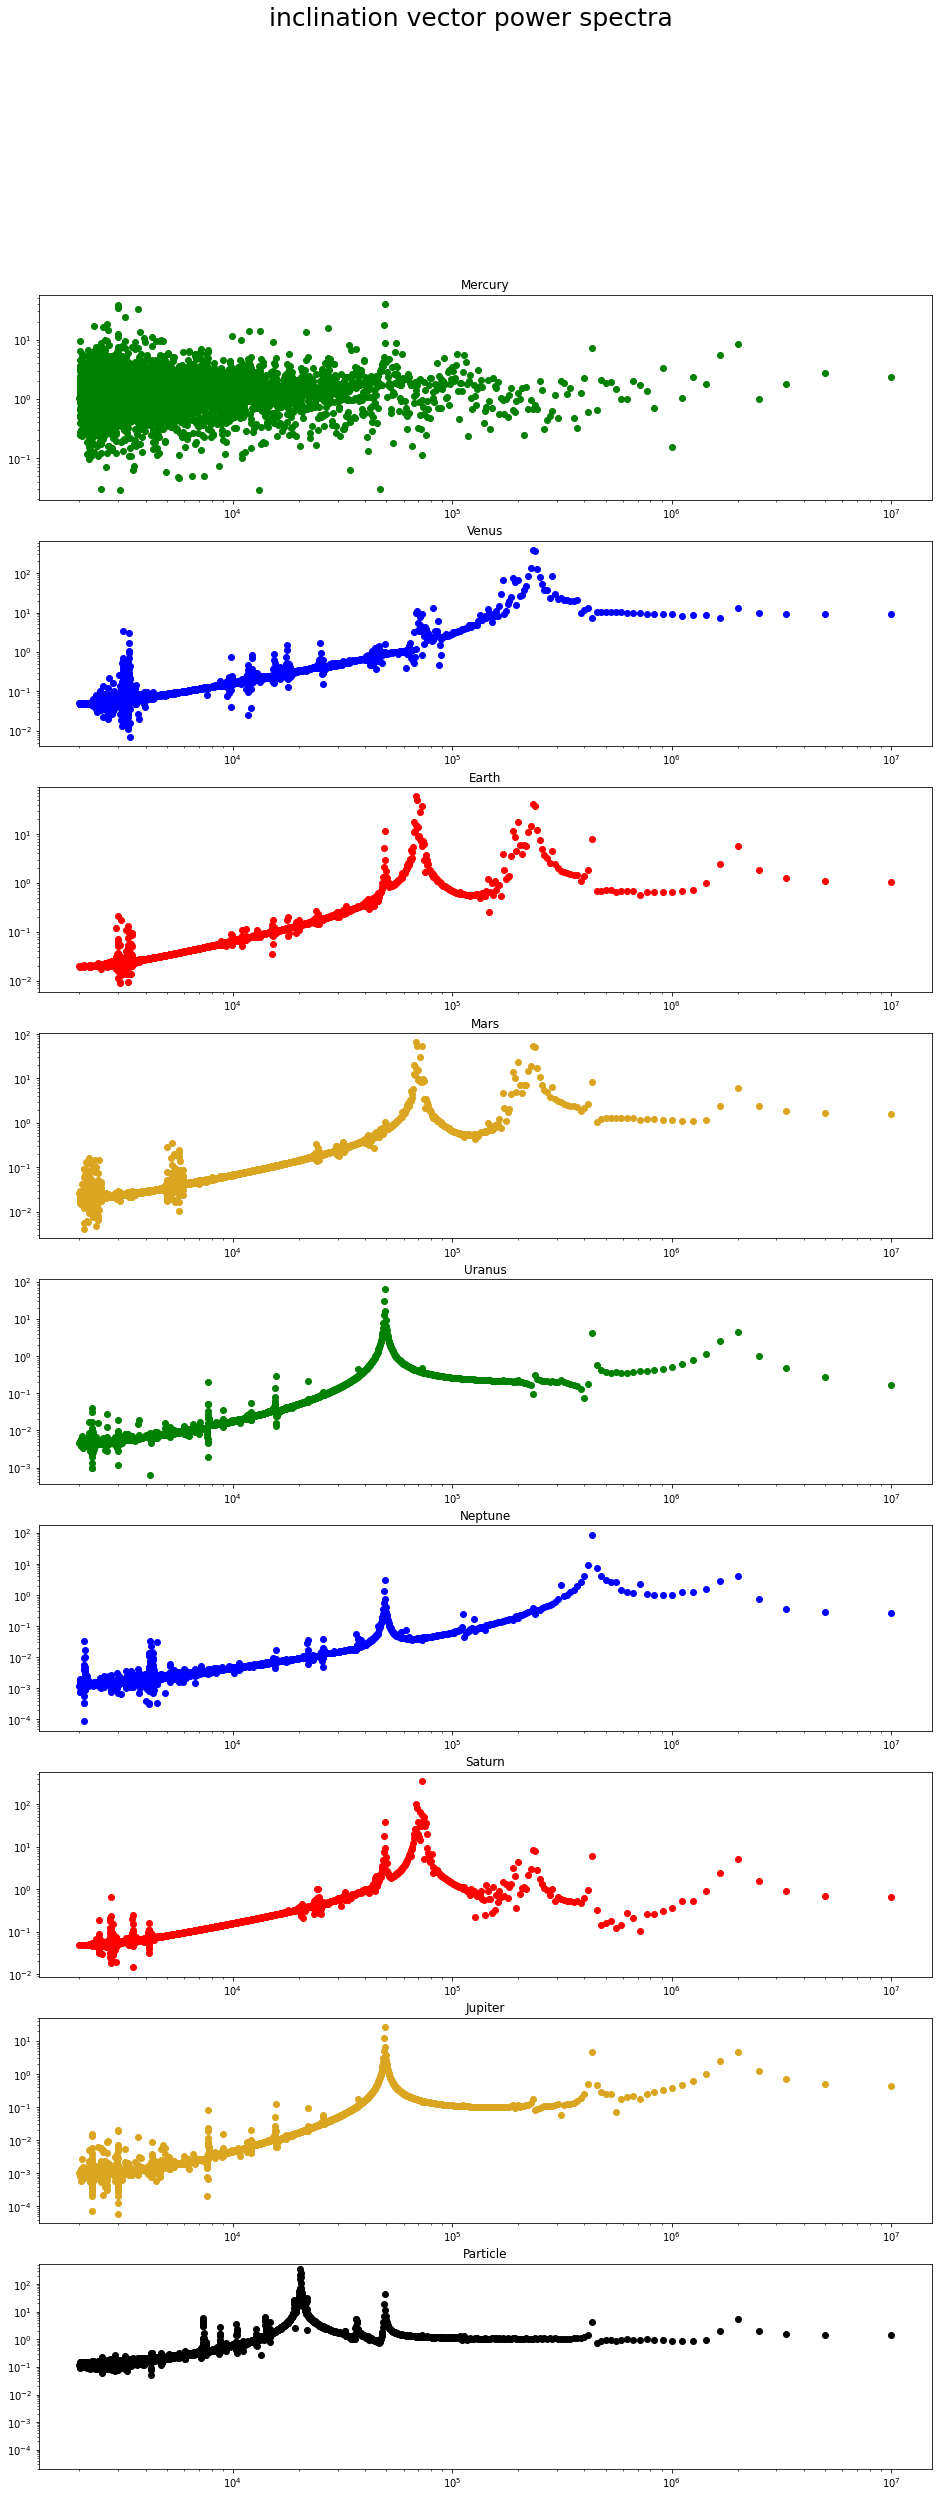

In [5]:
print(len(pYpj))
fig,ax = plt.subplots(9,figsize=(16,40))
ax[0].scatter(1/freq[1:],pYpmc[1:],label='mc',c='g')
ax[1].scatter(1/freq[1:],pYpv[1:],label='v',c='b')
ax[3].scatter(1/freq[1:],pYpe[1:],label='e',c='goldenrod')
ax[2].scatter(1/freq[1:],pYpmr[1:],label='mr',c='r')

ax[4].scatter(1/freq[1:],pYpu[1:],label='u',c='g')
ax[5].scatter(1/freq[1:],pYpn[1:],label='n',c='b')
ax[7].scatter(1/freq[1:],pYps[1:],label='s',c='goldenrod')
ax[6].scatter(1/freq[1:],pYpj[1:],label='j',c='r')


ax[8].scatter(1/freq[1:],pYp[1:],label='j',c='k')

ax[0].set_title('Mercury')
ax[1].set_title('Venus')
ax[2].set_title('Earth')
ax[3].set_title('Mars')

ax[4].set_title('Uranus')
ax[5].set_title('Neptune')
ax[7].set_title('Jupiter')
ax[6].set_title('Saturn')

ax[8].set_title('Particle')
#plt.scatter(1/freq[1:],pYp[1:],label='particle',c='k')
fig.suptitle('inclination vector power spectra',fontsize=25)
#plt.legend(loc='lower right')


#plt.axvline(x=1/freq[ipumax],c='g')
#plt.axvline(x=1/freq[ipjmax],c='r')
#plt.axvline(x=1/freq[ipsmax],c='goldenrod')
#plt.axvline(x=1/freq[ipnmax],c='b')

#plt.xlabel('period (yr)')
#plt.ylabel('Fourier Amplitude')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[3].set_yscale('log')
ax[3].set_xscale('log')

ax[4].set_yscale('log')
ax[4].set_xscale('log')
ax[5].set_yscale('log')
ax[5].set_xscale('log')
ax[6].set_yscale('log')
ax[6].set_xscale('log')
ax[7].set_yscale('log')
ax[7].set_xscale('log')

ax[8].set_yscale('log')
ax[8].set_xscale('log')
maxp = np.max([humax,hsmax,hjmax,hnmax,pYh[1:].max()])

plt.ylim([0.00002,2*maxp]);